In [228]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

In [229]:
data = pd.read_csv('house_prices.csv')

In [230]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,N,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,N,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,N,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,N,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,N,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [231]:
data.sample(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2472,3034200197,20140903T000000,549000.0,2,1.0,1510,11165,1.5,N,0,...,7,1510,0,1921,0,98133,47.7212,-122.331,2210,8851
19666,7853320550,20140805T000000,425000.0,4,2.5,2070,4427,2.0,N,0,...,7,2070,0,2007,0,98065,47.5208,-121.869,2070,4556


In [232]:
data.shape

(21613, 21)

In [233]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  object 
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  object 
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [234]:
data.isnull()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21609,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21610,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21611,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [235]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [236]:
x= data[['sqft_living']]
y = data['price']

In [237]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42)

In [238]:
model = LinearRegression()
model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [239]:
y_pred = model.predict(x_test)

In [240]:
mse = mean_absolute_error(y_test,y_pred)
print(f'mean squared error: {mse:.2f}')
r2 = r2_score(y_test, y_pred)
print(f'r2: {r2:.2f}')


mean squared error: 177867.54
r2: 0.49


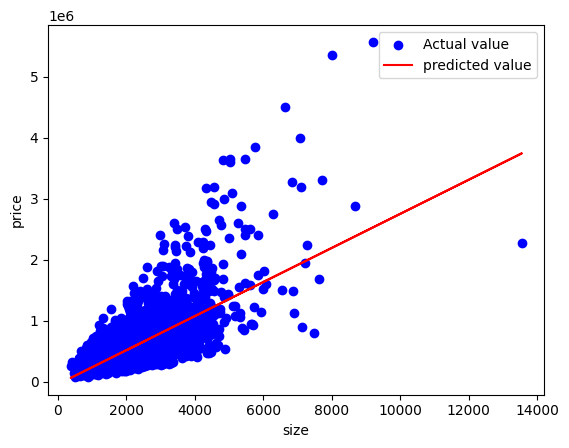

In [243]:

plt.scatter(x_test,y_test,color = 'blue', label= 'Actual value')
plt.plot(x_test, y_pred,color = 'red',label = 'predicted value')
plt.xlabel('size')
plt.ylabel('price')
plt.legend()
plt.show()

In [ ]:
#prediction house price of 1800 sqft

df = pd.DataFrame({'sqft_living':[1800]})
predicted_price = model.predict(df)
print(f"predicted price of house with 1800 sqft: ${predicted_price[0].item():,.2f}") 

predicted price of house with 1800 sqft:$461,199.42


## MULTIPLE LINEAR REGRESSION


In [ ]:
#multiple linear regression

data = pd.read_csv('house_prices.csv')

In [ ]:
x = data[['sqft_living','bedrooms']]
y= data['price']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(x_train,y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
y_pred = model.predict(x_test)

In [ ]:
mse = mean_absolute_error(y_test,y_pred)
print(f'mean squared error: {mse:.2f}')
r2 = r2_score(y_test, y_pred)
print(f'r2: {r2:.2f}')

mean squared error: 174564.05
r2: 0.51


In [ ]:

df = pd.DataFrame({'sqft_living':[1800],'bedrooms':[3]})
predicted_price = model.predict(df)
print(f"predicted price of house with 1800 sqft and 3 bedroom: ${predicted_price[0].item():,.2f}")

predicted price of house with 1800 sqft and 3 bedroom:$472,601.22
